# 1. Information

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

# 2. Fetching Data:

## 2.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 2.2 Import data

In [2]:
data = pd.read_csv("AB_NYC_2019.csv")
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.shape

(48895, 16)

In [4]:
# Base Info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

# 3. Data Cleaning

In [5]:
# Убираем ненужные колонки
data = data.drop(['id','name', 'host_id', 'host_name', 'last_review'], axis = 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [7]:
data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

В колонке *'reviews_per_month'* есть значения Nan. Их необходимо убрать.

In [8]:
#Заменяем все NaN значения в колонке 'reviews_per_month' на 0
data.fillna({'reviews_per_month':0}, inplace=True)

In [9]:
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [11]:
data.head(10)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [12]:
data[['neighbourhood_group', 'neighbourhood', 'room_type']]

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt
48893,Manhattan,Hell's Kitchen,Shared room


Все значения Nan заменены 0. 

##### Создаем новую переменную  **'center_distance'** вместо **'latitude'** и **'longitude'**
##### Координаты центра NYC 40.730610, -73.935242
##### Поскольку растояние расчитываем в пределах одного города, то можно прtнебречь кривизной земли и посчитать евклидово расстояние до центра

In [13]:
from scipy.spatial.distance import euclidean
nyc_center = np.array([[40.730610, -73.935242],[40.730610, -73.935242]])
#center_distanc = list(map(euclidean, nyc_center, data[['latitude', 'longitude']].to_numpy()))
nyc_center=np.repeat(nyc_center, [1,data.shape[0]-1], axis=0)
center_distanc= np.array(list(map(euclidean, nyc_center, data[['latitude', 'longitude']].to_numpy())))
data_cut = data.drop(['latitude', 'longitude'], axis = 1)
data = data_cut.join(pd.DataFrame(data = center_distanc, columns=['center_distanc'], index=None))

In [14]:
data.head(10)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distanc
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,0.091035
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,0.053707
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365,0.078692
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,0.051659
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,0.068461
5,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129,0.043264
6,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,0.40,1,0,0.048390
7,Manhattan,Hell's Kitchen,Private room,79,2,430,3.47,1,220,0.060366
8,Manhattan,Upper West Side,Private room,79,2,118,0.99,1,0,0.078028
9,Manhattan,Chinatown,Entire home/apt,150,1,160,1.33,4,188,0.057740


Теперь закодируем категориальные переменные

In [15]:
data_categ= (pd.get_dummies(data[['neighbourhood_group', 'neighbourhood', 'room_type']]))
data_cut = data.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis = 1)
data_num = data_cut.join(data_categ)

In [16]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Columns: 236 entries, price to room_type_Shared room
dtypes: float64(2), int64(5), uint8(229)
memory usage: 13.3 MB


# 4. Summary

## 4.1 Summary statistics for numeric attribute

In [17]:
data.describe(percentiles = [0.1, 0.25, 0.75, 0.95, 0.99])

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distanc
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,0.064665
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,0.034808
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.004953
10%,49.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.028692
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.043806
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,0.059210
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,0.076250
95%,355.000000,30.000000,114.000000,4.310000,15.000000,359.000000,0.134003
99%,799.000000,45.000000,214.000000,6.800000,232.000000,365.000000,0.193156


Некоторые переменные распределены очень неравномерно. Выбросы нужно исключить из выборки.

In [18]:
# price
idxMax_price=data[data['price'].gt(350)].index
data_new=data.drop(idxMax_price, axis=0)
data_num_new=data_num.drop(idxMax_price, axis=0)
# number_of_reviews
idxMax_num_of_rev=data_new[data['number_of_reviews'].gt(175)].index
data_new=data_new.drop(idxMax_num_of_rev, axis=0)
data_num_new=data_num_new.drop(idxMax_num_of_rev, axis=0)
# reviews_per_month
idxMax_reviews_per_month = data_new[data['reviews_per_month'].gt(6.8)].index
data_new=data_new.drop(idxMax_reviews_per_month, axis=0)
data_num_new=data_num_new.drop(idxMax_reviews_per_month, axis=0)
# center_distanc
idxMax_center_distanc=data_new[data['center_distanc'].gt(0.194)].index
data_new=data_new.drop(idxMax_center_distanc, axis=0)
data_num_new=data_num_new.drop(idxMax_center_distanc, axis=0)
# calculated_host_listings_count
idxMax_calculated_host=data_new[data['calculated_host_listings_count'].gt(232)].index
data_new=data_new.drop(idxMax_calculated_host, axis=0)
data_num_new=data_num_new.drop(idxMax_calculated_host, axis=0)
# minimum_nights
idxMax_minimum_nights=data_new[data['minimum_nights'].gt(30)].index
data_new=data_new.drop(idxMax_minimum_nights, axis=0)
data_num_new=data_num_new.drop(idxMax_minimum_nights, axis=0)

data=data_new
data_num=data_num_new
data.describe(percentiles = [0.1, 0.25, 0.75, 0.99])

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distanc
count,43720.000000,43720.000000,43720.000000,43720.000000,43720.000000,43720.000000,43720.000000
mean,122.517406,5.624291,19.387534,0.978866,4.854231,104.616766,0.063118
std,71.943973,8.192933,31.991809,1.328033,19.331718,128.982341,0.031589
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.004953
10%,48.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.028041
25%,65.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.043194
50%,100.000000,3.000000,5.000000,0.350000,1.000000,32.000000,0.058571
75%,160.000000,5.000000,22.000000,1.440000,2.000000,198.000000,0.075969
99%,345.000000,30.000000,148.000000,5.560000,96.000000,365.000000,0.173976
max,350.000000,30.000000,175.000000,6.800000,232.000000,365.000000,0.193957


## 4.2 Summary and count for categorical attribute

In [19]:
data.describe(include=["O"])

,neighbourhood_group,neighbourhood,room_type
count,43720,43720,43720
unique,5,185,3
top,Brooklyn,Williamsburg,Entire home/apt
freq,18812,3623,21739


# 5. EDA

## 5.1.Univariate analysis

## 5.1.1 Minimum Nights

### **i. Distribution**

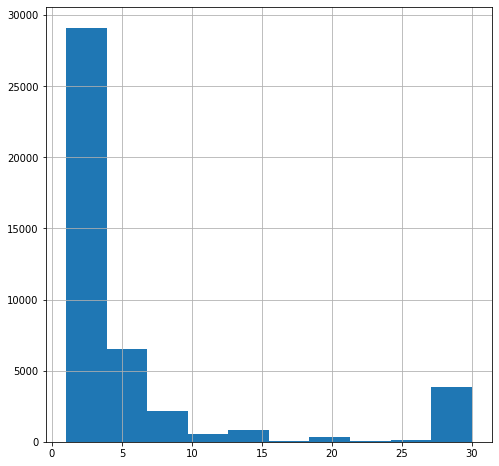

In [20]:
data['minimum_nights'].hist(figsize=(8,8))
plt.show()

## 5.1.2 Number Of Reviews

### **i. Distribution**

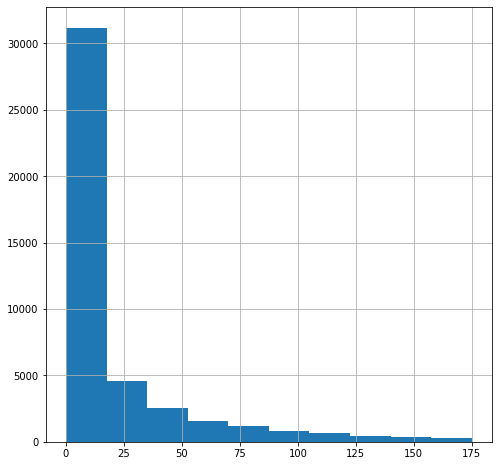

In [21]:
data['number_of_reviews'].hist(figsize=(8,8))
plt.show()

## 5.1.3 Reviews Per Month

### **i. Distribution**

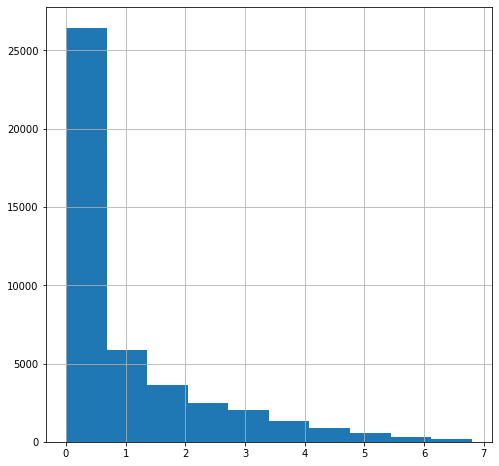

In [22]:
data['reviews_per_month'].hist(figsize=(8,8))
plt.show()

## 5.1.4 Calculated Host Listings Count

### **i. Distribution**

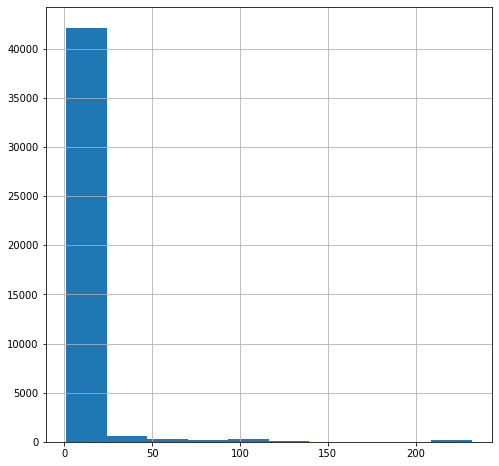

In [23]:
data['calculated_host_listings_count'].hist(figsize=(8,8))
plt.show()

## 5.1.5 Availability 365

### **i. Distribution**

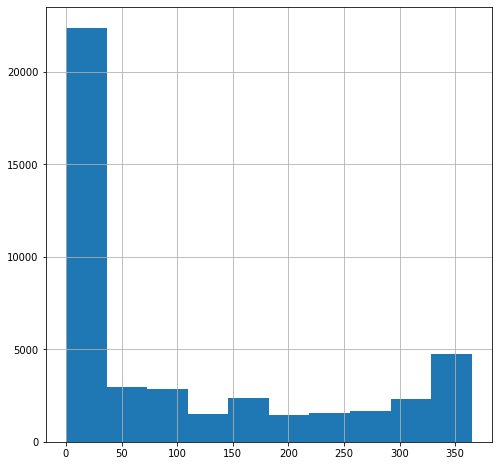

In [24]:
data['availability_365'].hist(figsize=(8,8))
plt.show()

## 5.1.6 Center Distanc

### **i. Distribution**

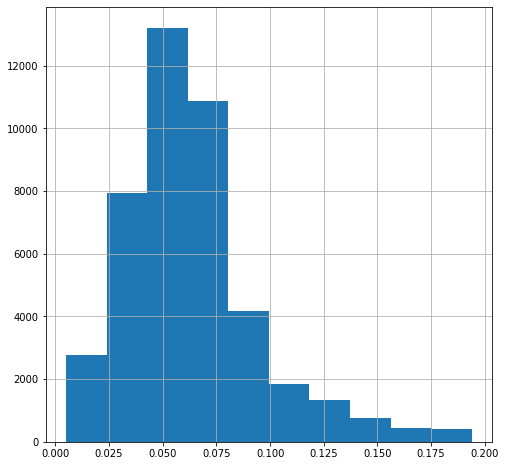

In [25]:
data['center_distanc'].hist(figsize=(8,8))
plt.show()

## 5.1.6 Neighbourhood Group

### **i. Distribution**

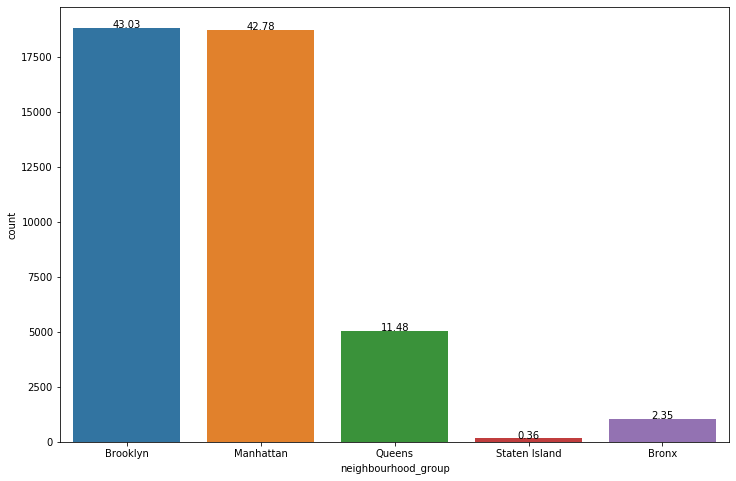

In [26]:
plt.figure(figsize=(12,8))

total = float(len(data["price"]) )

ax = sns.countplot(x="neighbourhood_group", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## 5.1.7 Neighbourhood

### **i. Distribution**
Distribution of top 10 neighbourhoods

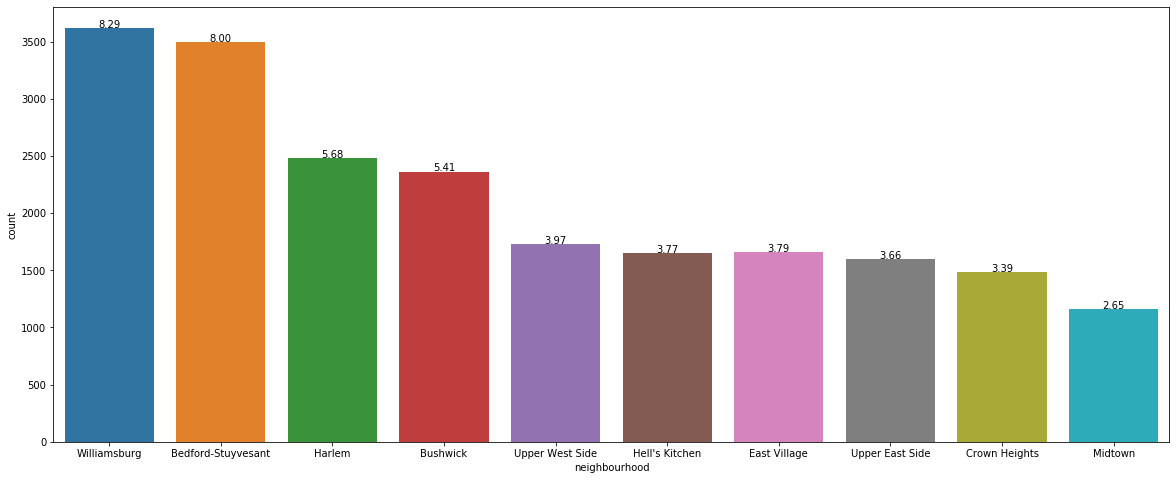

In [27]:
plt.figure(figsize=(20,8))
msot_neigh = ['Williamsburg','Bedford-Stuyvesant','Harlem',
              'Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown']
total = float(len(data["price"]) )

ax = sns.countplot(x="neighbourhood", order=msot_neigh, data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## 5.1.7 Room Type

### **i. Distribution**

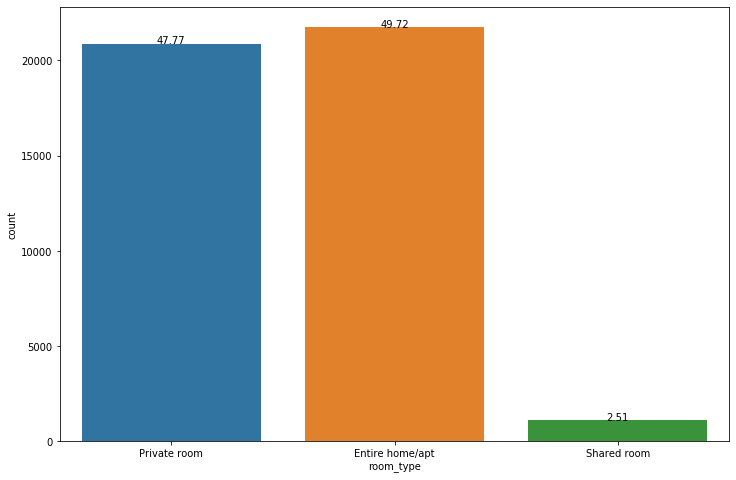

In [28]:
plt.figure(figsize=(12,8))

total = float(len(data["price"]) )

ax = sns.countplot(x="room_type", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## 5.1.8 Price(Target variable)

### **i. Distribution**

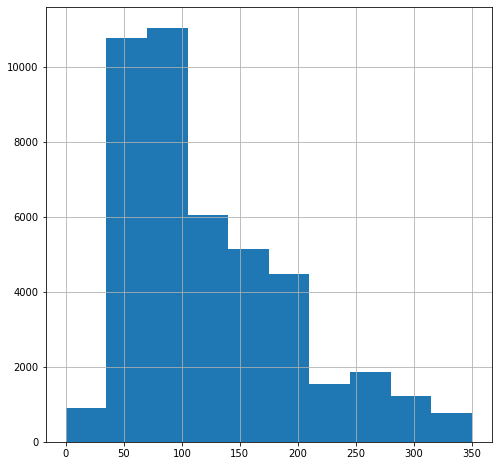

In [29]:
data['price'].hist(figsize=(8,8))
plt.show()

## 5.2	Some multivariate relationships

### **5.2.1 Correlation among the numeric variables.**

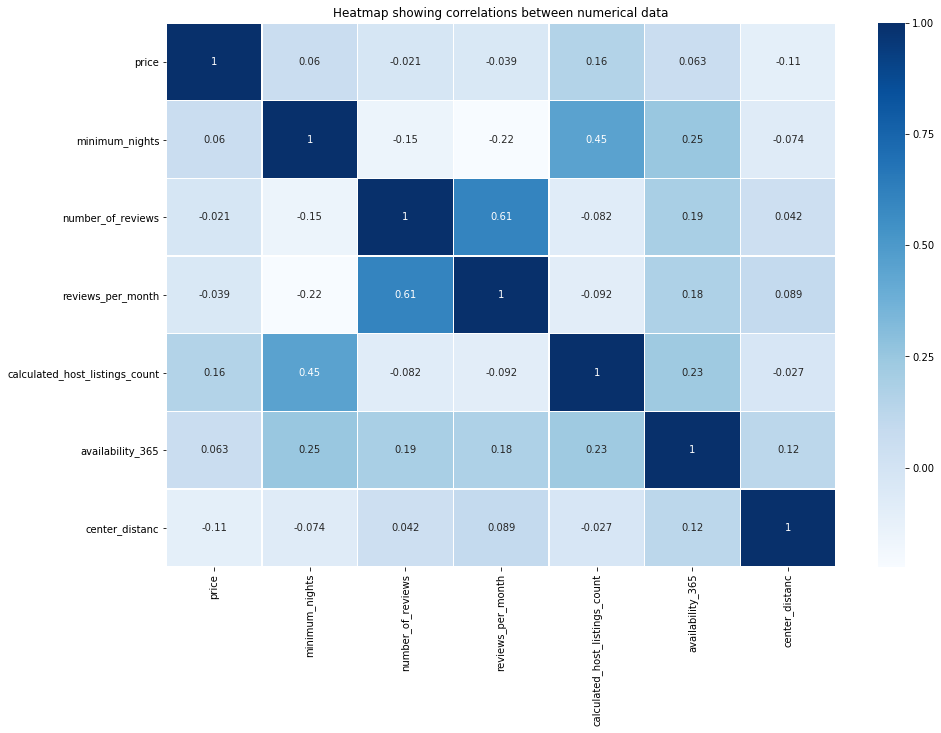

In [30]:
plt.figure(figsize=(15,10))  
ax=sns.heatmap(data.corr().dropna(),annot=True,linewidths=.5, cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap showing correlations between numerical data')
plt.show()

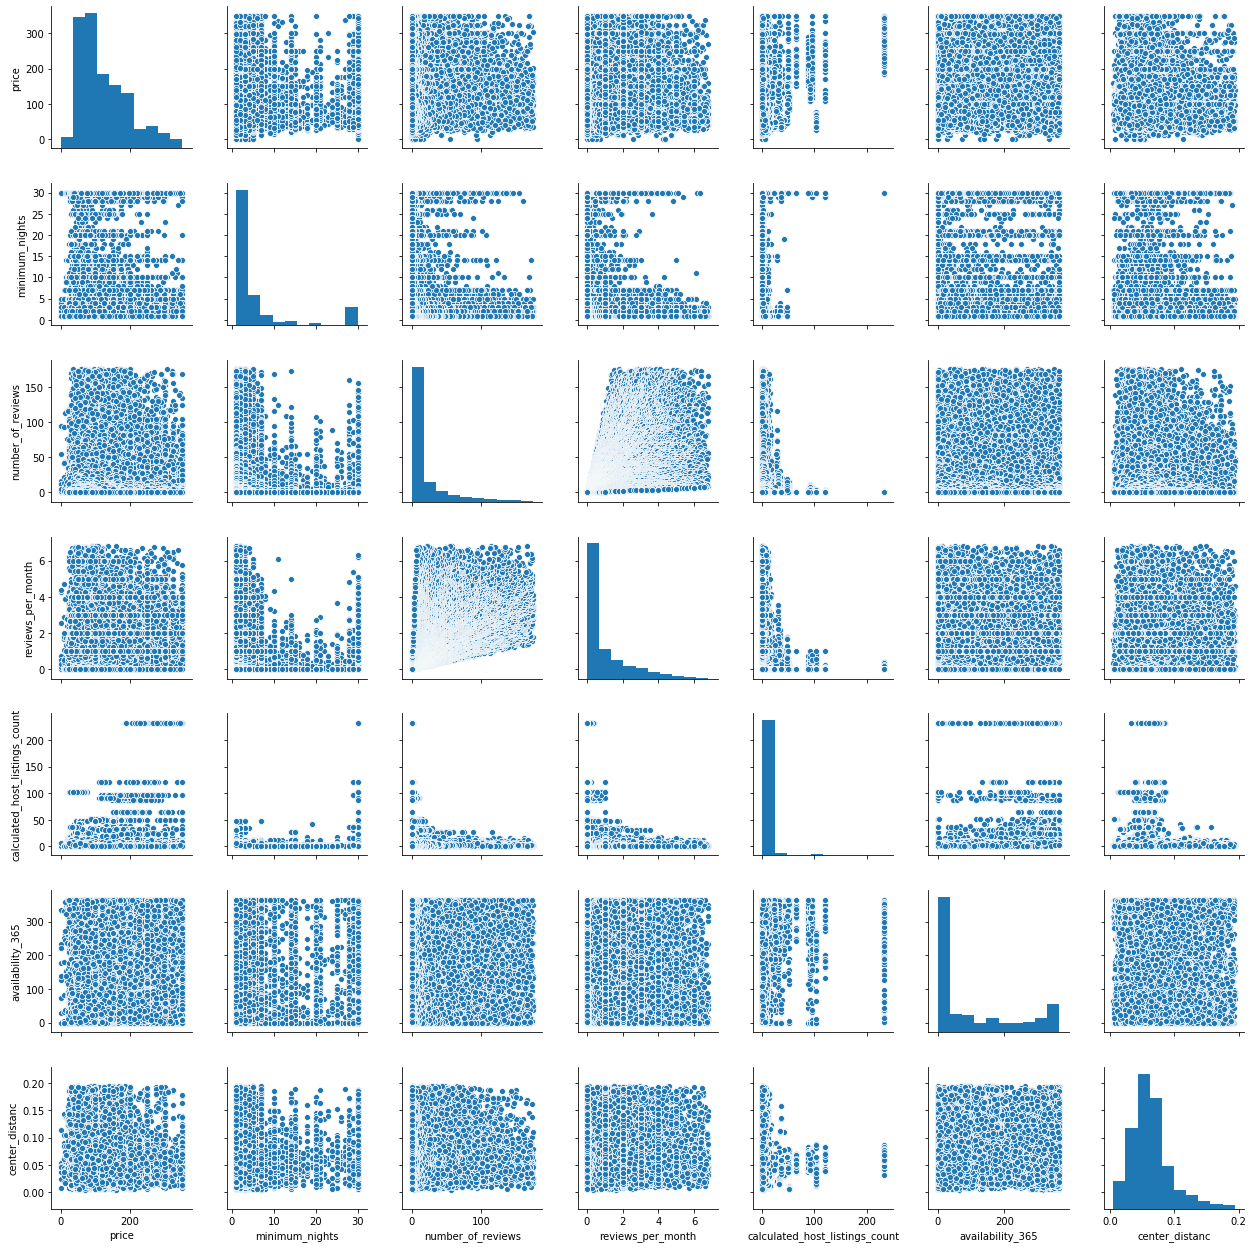

In [31]:
#Draw paired correlation graphs
num_vars=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
          'calculated_host_listings_count', 'availability_365', 'center_distanc']
sns.pairplot(data[num_vars])

Есть приличная корреляция между *'number_of_reviews'* и *'reviews_per_month'*, но лучше эти переменные оставить, так как данных не очень много и  характер зависимости не вполне явный.

# 6. Model Building

## 6.1 Data Preprocessing

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_num.drop(['price'], axis=1), data_num['price'], test_size=0.30, random_state=42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30604, 235), (13116, 235), (30604,), (13116,))

In [34]:
columns=data_num.drop(['price'], axis=1).columns


## 6.1 Regression Model

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

### 6.1.1 Simple Linear Regression

In [36]:
scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=1, include_bias=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()

polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", scaler),
        ("lin_reg", lin_reg),
    ])
#[0:100]
polynomial_regression.fit(X_train_scaled, y_train)
polynomial_regression.score(X_test_scaled, y_test)

-1.3663285563178741e+23

Очень плохой результат. По все видимости все так плохо потому, что нет регурелизации.

### 6.1.2 Lasso Regression Regularization 

In [37]:
from sklearn.linear_model import Lasso

poly_features = PolynomialFeatures(degree=1, include_bias=False)
std_scaler = StandardScaler()
lasso_reg = Lasso(alpha=0.5)

polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lasso_reg", lasso_reg),
    ])

polynomial_regression.fit(X_train, y_train)
polynomial_regression.score(X_test, y_test)

0.5112238080640281

Результат значительно лучше. Удается предсказать больше полвины из тестовой выборки.

In [38]:
#Drop zero coefficients
columns=data_num.drop(['price'], axis=1).columns
coef_lasso=pd.DataFrame(lasso_reg.coef_, index=columns).T
coef_lasso= coef_lasso.loc[:, (coef_lasso != 0).any(axis=0)]
coef_lasso.shape

(1, 89)

In [39]:
#Show Coefficients
coef_lasso

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distanc,neighbourhood_group_Bronx,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_Bay Terrace,...,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Vinegar Hill,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,room_type_Entire home/apt,room_type_Shared room
0,-9.623516,-2.393845,-0.741235,5.273971,9.175587,-3.16478,-0.978747,20.688027,-1.143887,0.081854,...,-1.351942,0.343265,1.167114,-4.920644,3.229663,6.27828,0.366456,-0.212997,38.764622,-3.451628


<function matplotlib.pyplot.show(*args, **kw)>

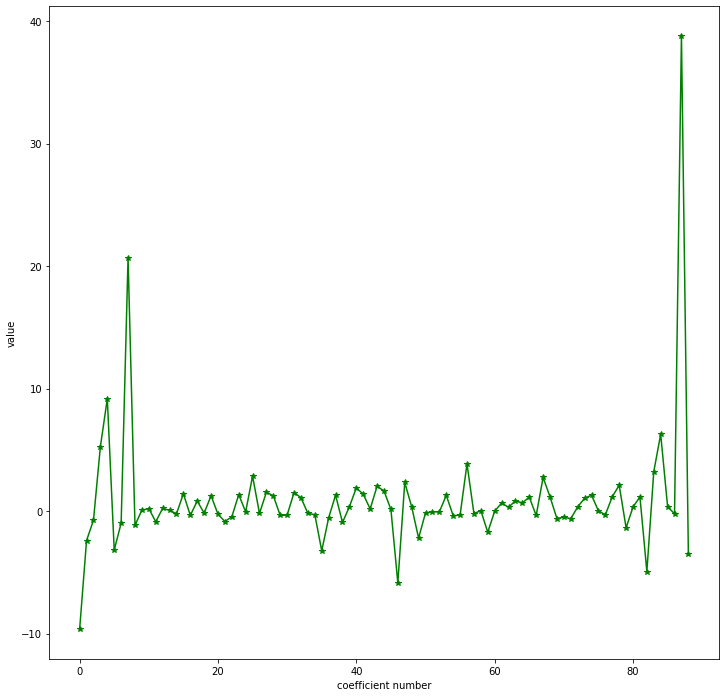

In [67]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot()
ax1.set_xlabel("coefficient number")
ax1.set_ylabel("value")
plt.plot(coef_lasso.T.values, '-*g')
plt.show

### 6.1.3 Ridge Regression Regularization 

In [47]:
from sklearn.linear_model import Ridge

scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=1, include_bias=False)

ridge = Ridge(alpha=0.8)
ridge_regression_train = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("ridge", ridge),
    ])

ridge_regression_train.fit(X_train, y_train)
ridge_regression_train.score(X_test, y_test)

0.5131870124308314

Есть небольшое улучшение. Так же удается предсказать больше полвины из тестовой выборки.

In [53]:
#Drop zero coefficients
columns=data_num.drop(['price'], axis=1).columns
coef_ridge=pd.DataFrame(ridge.coef_, index=columns).T
coef_ridge= coef.loc[:, (coef_ridge != 0).any(axis=0)]
coef_ridge.shape

(1, 197)

In [54]:
#Show Coefficients
coef_ridge

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distanc,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-11.08834,-3.012091,-0.939431,5.701013,10.464132,-4.907444,-1.972574,-3.932382,7.136355,-3.975002,...,-0.066789,-0.232642,3.211392,0.359612,-1.151488,-0.254654,-1.279821,20.768429,-17.859194,-9.447162


<function matplotlib.pyplot.show(*args, **kw)>

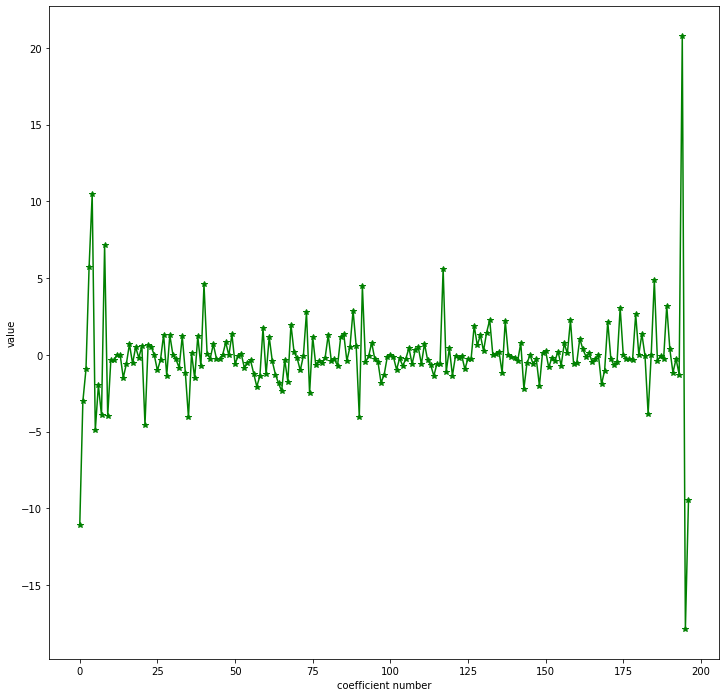

In [65]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot()
ax1.set_xlabel("coefficient number")
ax1.set_ylabel("value")
plt.plot(coef_ridge.T.values, '-*g')
plt.show

### 6.1.4 ElasticNetCV Regression Regularization 

In [52]:
from sklearn.linear_model import ElasticNetCV

scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=1, include_bias=False)

regr  = ElasticNetCV(l1_ratio=0.9)

polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("regr", regr),
    ])

polynomial_regression.fit(X_train, y_train)
polynomial_regression.score(X_test, y_test)

0.513812342860238

Результат примерно тот же, что и для Ridge.

In [56]:
#Drop zero coefficients
columns=data_num.drop(['price'], axis=1).columns
coef_elast=pd.DataFrame(regr.coef_, index=columns).T
coef_elast= coef_elast.loc[:, (coef_elast != 0).any(axis=0)]
coef_elast.shape

(1, 164)

In [57]:
#Show Coefficients
coef_elast

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,center_distanc,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,neighbourhood_West Village,neighbourhood_Westchester Square,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-10.450485,-2.785314,-0.86948,5.523067,9.942091,-4.549712,-2.174215,-0.814681,13.168433,-3.8118,...,4.297746,-0.127313,3.882167,0.374894,-0.659493,-0.011298,-0.558097,22.039833,-16.366367,-8.796114


<function matplotlib.pyplot.show(*args, **kw)>

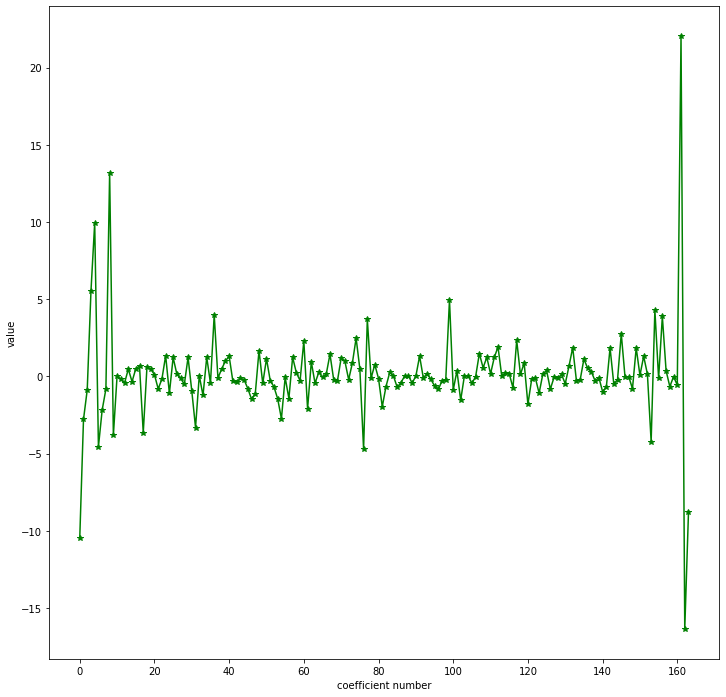

In [64]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot()
ax1.set_xlabel("coefficient number")
ax1.set_ylabel("value")
plt.plot(coef_elast.T.values, '-*g')
plt.show

# 7. Conclusion

* К сожалению, модель работает не очень хорошо. Хотя работу модели удалось значительно улучшить за счет удаления выбросов из выборки.
* Применение модели линейной регрессии без регуляризации не целесообразно, так как без регуляризации она вообще не работает.
* Различные регуляризации дают приблизительно одинаковый результат, но применение Lasso- регуляризации дает меньшее количество коэффициентов (89), что хорошо для имплементации модели.
* Самыми важными признаками, согласно весам, которые раздала модель, можно считать *’minimum_nights’*, *’calculated_host_listings_count’*, *‘availability_365’*, *’neighbourhood_group_Manhattan’*, *’neighbourhood_Williamsburg’*, *’room_type_Entire home/apt’*. Зная веса и знак можно сделать вывод о там, на сколько влияет каждый признак на стоимость жилья.